# Sales Production Analysis

## Import Library

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read Dataset From 12 Files CSV

In [47]:
files = [file for file in os.listdir('/content/Sales')]
for file in files:
    print(file)

Sales_December_2019.csv
Sales_October_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_January_2019.csv
Sales_August_2019.csv
Sales_July_2019.csv
Sales_November_2019.csv
Sales_September_2019.csv
Sales_April_2019.csv
Sales_February_2019.csv
Sales_May_2019.csv


In [48]:
#Create empty data frame for all data
all_data = pd.DataFrame()

#Make a loop for Concatenate the data
for file in files:
    data = pd.read_csv("/content/Sales/" + file)
    all_data = pd.concat([all_data, data])


In [49]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
16630,209916,Bose SoundSport Headphones,1,99.99,05/08/19 19:15,"235 Center St, Seattle, WA 98101"
16631,209917,Wired Headphones,1,11.99,05/24/19 22:02,"926 9th St, San Francisco, CA 94016"
16632,209918,AAA Batteries (4-pack),2,2.99,05/24/19 17:44,"868 Hickory St, Boston, MA 02215"
16633,209919,USB-C Charging Cable,1,11.95,05/04/19 12:46,"204 Adams St, Seattle, WA 98101"


## Preprocessing

### How to handle missing values

Check how many missing values are there in the Sales Dataset.

In [50]:
count_misval = all_data.isnull().sum()
count_misval

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Handling missing values

In [51]:
all_data = all_data.dropna()
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
16630,209916,Bose SoundSport Headphones,1,99.99,05/08/19 19:15,"235 Center St, Seattle, WA 98101"
16631,209917,Wired Headphones,1,11.99,05/24/19 22:02,"926 9th St, San Francisco, CA 94016"
16632,209918,AAA Batteries (4-pack),2,2.99,05/24/19 17:44,"868 Hickory St, Boston, MA 02215"
16633,209919,USB-C Charging Cable,1,11.95,05/04/19 12:46,"204 Adams St, Seattle, WA 98101"


### Make new column "Month and Day"

Filter a unique quantity order from unique values.

In [52]:
filter = all_data['Quantity Ordered'] == 'Quantity Ordered'
all_data = all_data[~filter]
all_data['Quantity Ordered'].unique()

array(['1', '2', '4', '3', '7', '5', '6', '8', '9'], dtype=object)

Change the value type of features to make it easier when creating new features.

In [53]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

<ipython-input-53-e96cf6f14393>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
<ipython-input-53-e96cf6f14393>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] = all_data['Price Each'].astype(float)
<ipython-input-53-e96cf6f14393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

Create new features that include the month, day, and hour from the Order Date

In [54]:
all_data['Month'] = all_data['Order Date'].dt.month
all_data['Day'] = all_data['Order Date'].dt.dayofweek
all_data['Hour'] = all_data['Order Date'].dt.hour

<ipython-input-54-359991d8d937>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Order Date'].dt.month
<ipython-input-54-359991d8d937>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Day'] = all_data['Order Date'].dt.dayofweek
<ipython-input-54-359991d8d937>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [55]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,0,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,6,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,3,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,6,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,2,12
...,...,...,...,...,...,...,...,...,...
16630,209916,Bose SoundSport Headphones,1,99.99,2019-05-08 19:15:00,"235 Center St, Seattle, WA 98101",5,2,19
16631,209917,Wired Headphones,1,11.99,2019-05-24 22:02:00,"926 9th St, San Francisco, CA 94016",5,4,22
16632,209918,AAA Batteries (4-pack),2,2.99,2019-05-24 17:44:00,"868 Hickory St, Boston, MA 02215",5,4,17
16633,209919,USB-C Charging Cable,1,11.95,2019-05-04 12:46:00,"204 Adams St, Seattle, WA 98101",5,5,12


### Best 5 Product

In [56]:
all_data['Grandtotal'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data

<ipython-input-56-9a619eb8031f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Grandtotal'] = all_data['Quantity Ordered'] * all_data['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Day,Hour,Grandtotal
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,0,0,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,6,7,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,3,18,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,6,15,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,2,12,11.95
...,...,...,...,...,...,...,...,...,...,...
16630,209916,Bose SoundSport Headphones,1,99.99,2019-05-08 19:15:00,"235 Center St, Seattle, WA 98101",5,2,19,99.99
16631,209917,Wired Headphones,1,11.99,2019-05-24 22:02:00,"926 9th St, San Francisco, CA 94016",5,4,22,11.99
16632,209918,AAA Batteries (4-pack),2,2.99,2019-05-24 17:44:00,"868 Hickory St, Boston, MA 02215",5,4,17,5.98
16633,209919,USB-C Charging Cable,1,11.95,2019-05-04 12:46:00,"204 Adams St, Seattle, WA 98101",5,5,12,11.95


In [57]:
product_totals = all_data.groupby('Product')['Grandtotal'].sum()
product_totals = product_totals.sort_values(ascending=False)

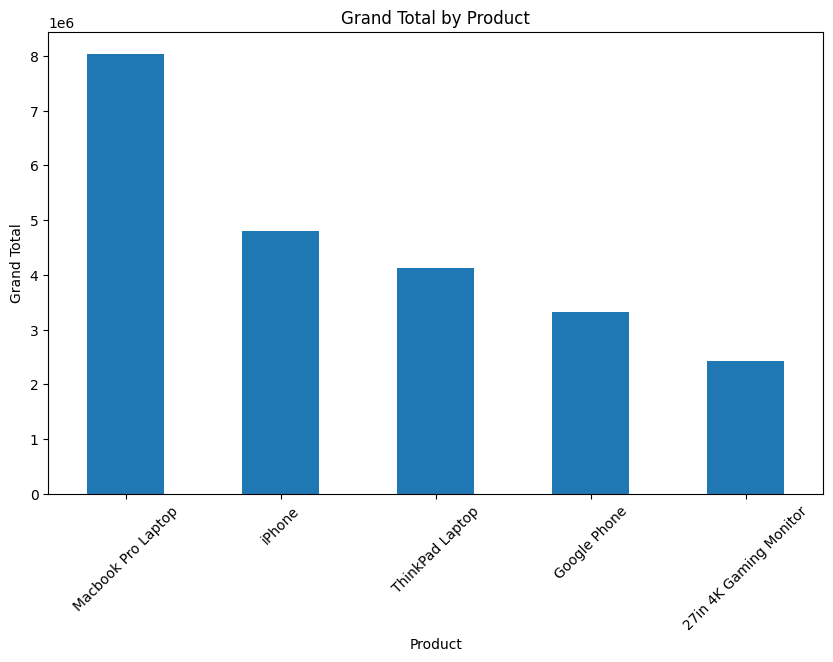

In [58]:
# Plot the grand total by product
plt.figure(figsize=(10, 6))
product_totals.head(5).plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Grand Total')
plt.title('Grand Total by Product')
plt.xticks(rotation=45)
plt.show()

## The 5 Best Month Higher Revenue

In [60]:
month_income = all_data.groupby('Month')['Grandtotal'].sum()
month_income = month_income.sort_values(ascending=False)
month_income

Month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Grandtotal, dtype: float64

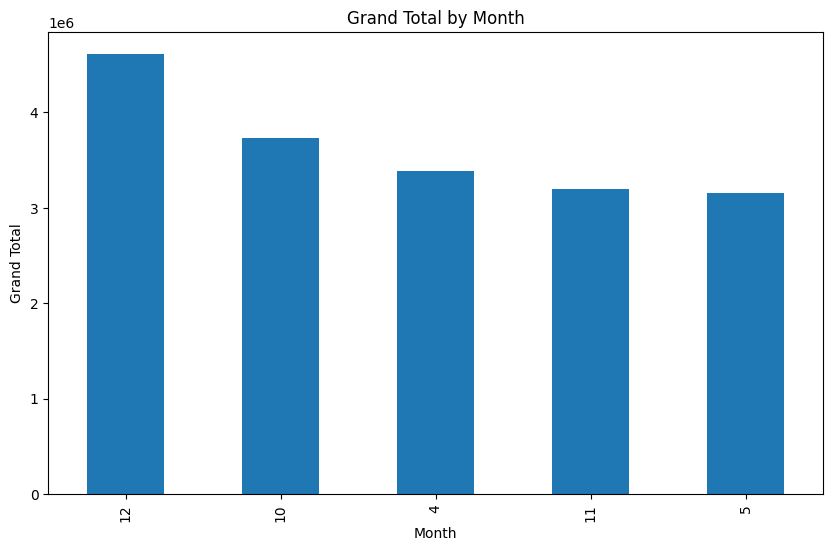

In [64]:
# Plot the grand total by Month
plt.figure(figsize=(10, 6))
month_income.head(5).plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Grand Total')
plt.title('Grand Total by Month')
plt.xticks(rotation=90)
plt.show()